# Conduct a geographic analysis and visualise the outcome
by Smahi

## Scope
Geographic Analysis:

    a. What are the geographical locations of customers based on latitude and longitude?
    
    b. Are there any clusters of customers in specific geographical areas (e.g., using pin codes)?
    
    c. Do certain pin codes have a higher concentration of customers than others?


## Summary
- **Geographical and cluster visuals**
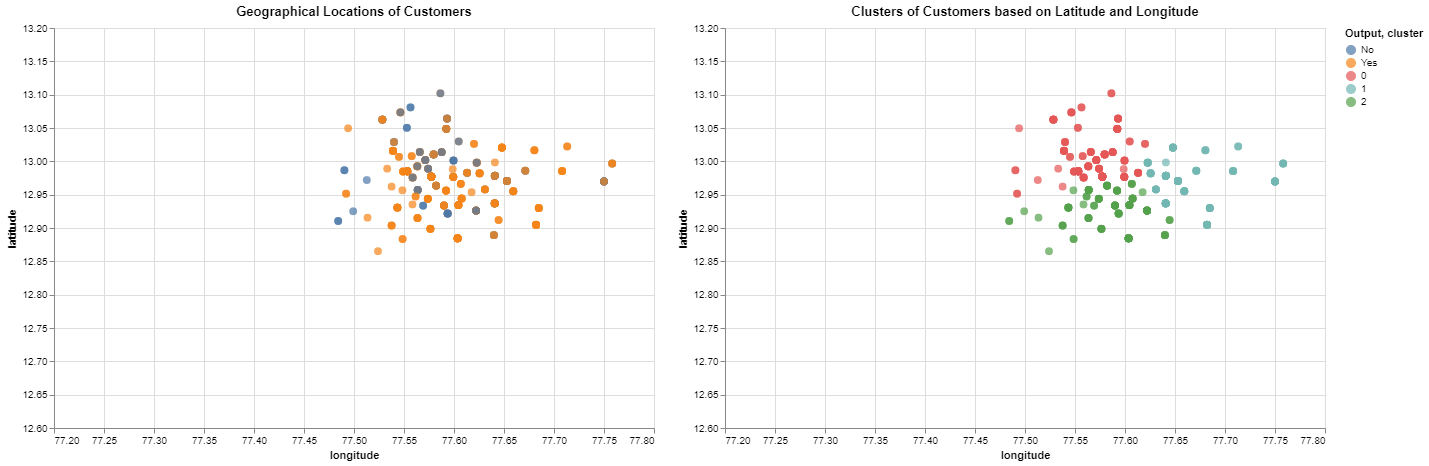


- There are more Orange shade circles which represent whether the customer ordered again and it can be seen they are more in number
- The data gatheres seems to  be from closeby locations as all the dots are very near to each other.
- A few blue circles can be evidently seen which represent that the customer did not order online again.

- **Pincode visuals**

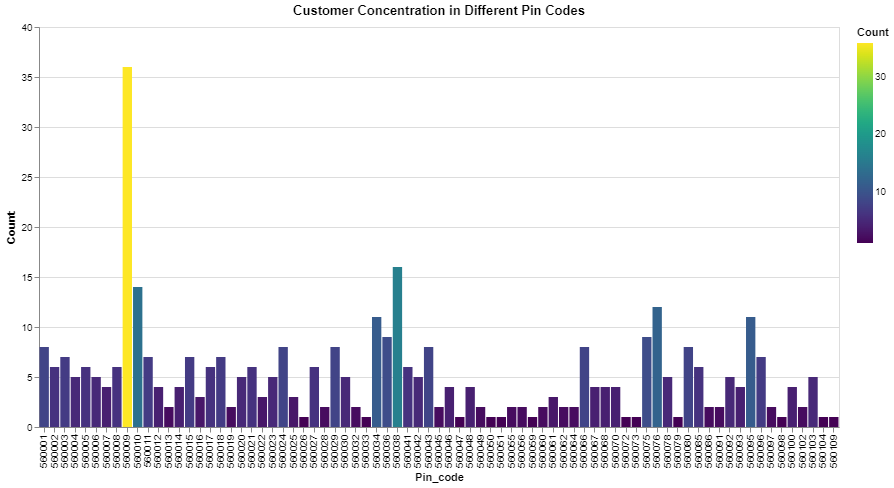


- One pincode really stands out `560009`, contributing to 36 customers.
- Other top 5 pin codes are `560038, 560010, 560038, 560076, 560095, 560034`.
- These 6 most popular areas make about `100 orders`, which is around `25%` of all orders coming in.

## Imports

In [1]:
import pandas as pd
import altair as alt
from sklearn.cluster import KMeans


In [2]:
# Load the dataset
df = pd.read_csv('C:/Users/SMAHI/Desktop/Online-food-delivery/Data/clean_data.csv') 

In [3]:
# Preview
df.head()

,Age,Gender,Marital_status,Occupation,Monthly_income,Education,Family_size,latitude,longitude,Pin_code,Output,Feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive


In [4]:
# Shape
df.shape

(388, 12)

In [5]:
df.longitude.describe()

count    388.000000
mean      77.600160
std        0.051354
min       77.484200
25%       77.565275
50%       77.592100
75%       77.630900
max       77.758200
Name: longitude, dtype: float64

In [6]:
df.latitude.describe()

count    388.000000
mean      12.972058
std        0.044489
min       12.865200
25%       12.936900
50%       12.977000
75%       12.997025
max       13.102000
Name: latitude, dtype: float64

## Visualising the geographical locations

In [7]:
# Set the domain for x-axis (longitude) and y-axis (latitude)
x_domain = [77.2, 77.8]
y_domain = [12.6, 13.2]

In [8]:
# a. Scatter plot of geographical locations based on latitude and longitude
scatter_plot = alt.Chart(df).mark_circle(size=60).encode(
    x=alt.X('longitude:Q', scale=alt.Scale(domain=x_domain)),
    y=alt.Y('latitude:Q', scale=alt.Scale(domain=y_domain)),
    color='Output:N',
    tooltip=['latitude:Q', 'longitude:Q']
).properties(
    width=600,
    height=400,
    title='Geographical Locations of Customers'
)


In [9]:
scatter_plot

alt.Chart(...)

## Plot Insights
- There are more Orange shade circles which represent whether the customer ordered again and it can be seen they are more in number
- The data gatheres seems to  be from closeby locations as all the dots are very near to each other.
- A few blue circles can be evidently seen which represent that the customer did not order online again.

In [10]:
# Extract latitude and longitude columns
coordinates = df[['latitude', 'longitude']]

In [11]:
# b. K-means clustering to identify clusters of customers
kmeans = KMeans(n_clusters=3)  # You can adjust the number of clusters based on your data
df['cluster'] = kmeans.fit_predict(coordinates)


In [12]:
# Scatter plot with clusters
cluster_plot = alt.Chart(df).mark_circle(size=60).encode(
    x=alt.X('longitude:Q', scale=alt.Scale(domain=x_domain)),
    y=alt.Y('latitude:Q', scale=alt.Scale(domain=y_domain)),
    color='cluster:N',
    tooltip=['latitude:Q', 'longitude:Q']
).properties(
    width=600,
    height=400,
    title='Clusters of Customers based on Latitude and Longitude'
)

In [13]:
cluster_plot

alt.Chart(...)

## Plot Insights
- As the data points are already pretty close to each other, there can't be a significant distance among the clusters.
- I think still we could make 3 clusters East, North west and South west, which is why I choose K=3 and it seem to work.

In [14]:
scatter_plot | cluster_plot

alt.HConcatChart(...)

- When looking side by side cluster 0 and 1 are the ones with more NOs as an ouput than cluster 3.

In [15]:
# c. Pin code analysis
pin_code_counts = df['Pin_code'].value_counts().reset_index()
pin_code_counts.columns = ['Pin_code', 'Count']

In [16]:
bar_chart = alt.Chart(pin_code_counts).mark_bar().encode(
    x='Pin_code:N',
    y='Count:Q',
    color=alt.Color('Count:Q', scale=alt.Scale(scheme='viridis')),
    tooltip=['Pin_code:N', 'Count:Q']
).properties(
    width=800,
    height=400,
    title='Customer Concentration in Different Pin Codes'
)

In [17]:
bar_chart

alt.Chart(...)

## Plot Insights
- One pincode really stands out `560009`, contributing to 36 customers.
- Other top 5 pin codes are `560038, 560010, 560038, 560076, 560095, 560034`.
- These 6 most popular areas make about `100 orders`, which is around `25%` of all orders coming in.